## Chapter 1

In [14]:
colors = ["powderblue","cornflowerblue","black"] #cadetblue
colors = [(38/255,70/255,83/255,1),(231/255,111/255,81/255,1),(42/255,157/255,143/255,1)]
colors = [(42/255,157/255,143/255,0.8),(231/255,111/255,81/255,1),(38/255,70/255,83/255,1),(233/255,196/255,106/255),(244/255, 162/255, 97/255)]

In [195]:
a_list = [1,2,3]
a_list += [1,2,3]
print(a_list)

[1, 2, 3, 1, 2, 3]


#### Limit order book

Real

In [100]:
import pandas as pd
df = pd.read_csv("data/2019_05_19BTX_O.csv",low_memory = False) # Load .csv
df.columns = ["index","time","bid","bidSize","ask","askSize"]

In [101]:
df_trades = pd.read_csv("data/2019_05_19BTX_TF.csv",low_memory = False) # Load .csv

In [131]:
#print(df[df["ask"]>df["ask"].shift(1)])
print(df[44:48])
df_trades[16:20]
#df_trades[df_trades["size"] > 100000]



    index                       time     bid  bidSize     ask   askSize
44     44  0 days 00:00:06.997000000  7257.0   1888.0  7257.5   12164.0
45     45  0 days 00:00:07.074000000  7257.0   1888.0  7257.5   11164.0
46     46  0 days 00:00:07.097000000  7257.0   1888.0  7258.0  555805.0
47     47  0 days 00:00:07.136000000  7257.0   1888.0  7257.5   90053.0


,Unnamed: 0,time,side,size,price
16,16,0 days 00:00:07.074000000,b'Buy',1000.0,7257.5
17,17,0 days 00:00:07.097000000,b'Buy',304.0,7258.0
18,18,0 days 00:00:07.097000000,b'Buy',304.0,7258.0
19,19,0 days 00:00:07.097000000,b'Buy',304.0,7258.0


Artificial

[530.5 531.  531.5 532.  532.5 533.  533.5 534. ]


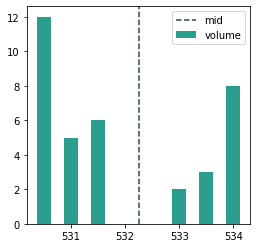

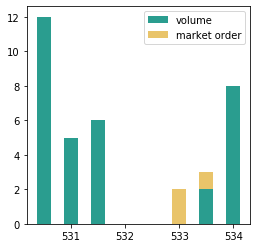

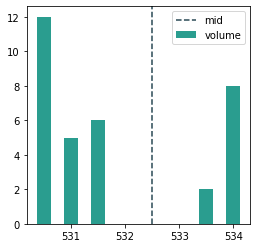

In [63]:
fig_size = (4,4)
plt.figure(figsize=fig_size)
x_vals = np.linspace(530.5,534,8)
print(x_vals)
y_vals = [12,5,6,0,0,2,3,8]
y_vals2 = [12,5,6,0,0,0,2,8]
mo_vals = [0,0,0,0,0,2,1,0]
mo_base= [0,0,0,0,0,0,2,0]
plt.bar(x_vals,y_vals,width = 0.25,alpha = 1, color = colors[0],label="volume")
plt.axvline(x=532.25,c=colors[2],ls="--",label = "mid")
plt.xlabel = "12:43:01"
plt.legend()
plt.savefig("mo0.pdf",bbox_inches='tight')
plt.show()

plt.figure(figsize=fig_size)
plt.bar(x_vals,y_vals,width = 0.25,alpha = 1, color = colors[0],label="volume")
plt.bar(x_vals,mo_vals,width = 0.25,alpha = 1,bottom = mo_base,color=colors[3],label="market order")
plt.xlabel = "12:43:01.233"
plt.legend()
plt.savefig("mo1.pdf",bbox_inches='tight')
plt.show()

plt.figure(figsize=fig_size)
plt.bar(x_vals,y_vals2,width = 0.25,alpha = 1, color = colors[0],label="volume")
plt.axvline(x=532.5,c=colors[2],ls="--",label = "mid")
plt.xlabel = "12:43:01.233"
plt.legend()
plt.savefig("mo2.pdf",bbox_inches='tight')
plt.show()

Example showing Assumption 1 using BTX data

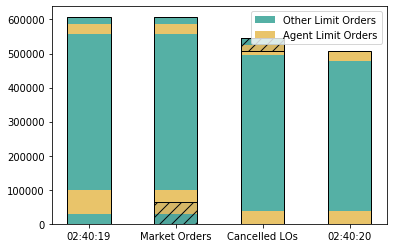

In [79]:
from matplotlib import pyplot as plt
import numpy as np
total = [608083,508855]
mo = 62684

width = 0.5
x_vals = ["02:40:19","Market Orders","Cancelled LOs","02:40:20"]
full_pos = [total[0],total[0],total[0]-mo,total[1]]
market_orders = [0,62684,total[0]-total[1]-mo,0]
agent_pos1 = [total[0]-50000,total[0]-50000,total[0]-50000-mo,total[1]-30000]
agent_size1 = [30000,30000,30000,30000]
agent_size2 = [70000,70000,70000-62684+30000,70000-62684+30000]
agent_pos2 = [30000,30000,0,0]
cancelled_orders = [0,62684,total[0]-62684-total[1],0]
cancelled_offset = [0,0,total[1],0]

p1 = plt.bar(x_vals, full_pos, width,color=colors[0],label="Other Limit Orders")
p2 = plt.bar(x_vals, agent_size1, width,
             bottom=agent_pos1,color=colors[3],label="Agent Limit Orders")
p3 = plt.bar(x_vals, agent_size2, width,
             bottom=agent_pos2,color=colors[3])
p4 = plt.bar(x_vals, market_orders, width,bottom=cancelled_offset,
             color=None,alpha=1,edgecolor="black",hatch ="//",fill = False)
p5 = plt.bar(x_vals, market_orders, width,
           color=colors[2],bottom=cancelled_offset,alpha=0.1)

outerbar = plt.bar(x_vals, full_pos, width,fill=False,edgecolor="black")
plt.legend()
#plt.ylim((0,800000))
plt.savefig("cancelledLOFig")
plt.show()


#plt.axvline(x=532.5,c="black",ls="--")

## Chapter 2

In [4]:
import numpy as np
from matplotlib import pyplot as plt
N = 41
V_max = 0.2
z = np.array(range(N)) * (2 * V_max) / (N - 1) - V_max

In [5]:
def gauss(x,mu=0,sigma2=1):
    return np.exp(-(x - mu)**2 / (2 * sigma2))/np.sqrt(2 * np.pi * sigma2)

Illustrates the mapping of the support to be state dependent

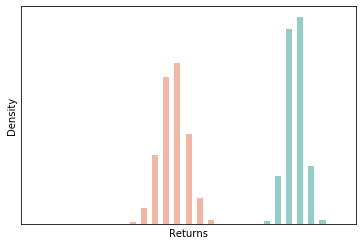

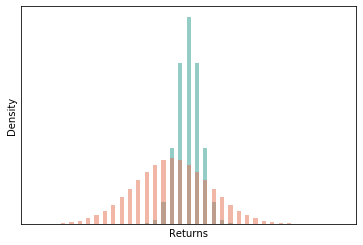

In [28]:
x_vals = np.linspace(0,11,31)
y_vals = gauss(x_vals,mu = 9, sigma2 = 0.1)
y_vals1 = gauss(x_vals,mu = 5, sigma2 = 0.2)
plt.bar(x_vals,y_vals,width = 0.2,alpha = 0.5, color=colors[0])
plt.bar(x_vals,y_vals1,width = 0.2,alpha = 0.5, color=colors[1])
#print(values)
#plt.hist(values,width = 0.2)
x_lims = (0,11)
plt.xlim(x_lims) # Temporary
plt.xticks([])
plt.yticks([])
plt.xlabel("Returns")
plt.ylabel("Density")
plt.savefig("presentation_fig1")
plt.show()

x_vals = np.linspace(-1.5,1.5,31)
y_vals = gauss(x_vals,mu = 0, sigma2 = 0.02)
y_vals1 = gauss(x_vals,mu = -0.2, sigma2 = 0.2)
plt.bar(x_vals,y_vals,width = 0.05,alpha = 0.5,color=colors[0])
plt.bar(x_vals,y_vals1,width = 0.05,alpha = 0.5,color=colors[1])
#print(values)
#plt.hist(values,width = 0.2)
x_lims = (-2,2)
plt.xlim(x_lims) # Temporary
plt.xticks([])
plt.yticks([])
plt.ylabel("Density")
plt.xlabel("Returns")
plt.savefig("presentation_fig2")
plt.show()

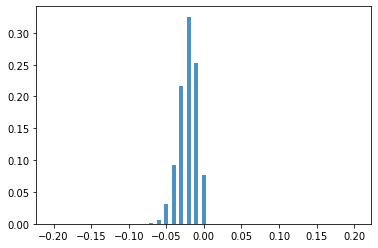

In [9]:
plt.bar(z,array,alpha = 0.8,width = 0.005,label = f"act {2}")
#plt.bar(bar_agent.z,bar_agent.probs(state)[bar_act][0],alpha = 0.8,width = 0.05,label = f"act {bar_act}")
plt.show()

In [1]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


In [2]:
find_nearest(y_vals,0.4)

NameError: name 'y_vals' is not defined

20.0


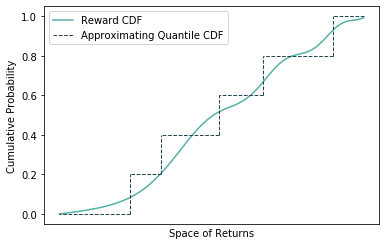

In [49]:
x_vals = np.linspace(0,1,100)
y_vals = [0]
for i in range(1,100):
    y_vals.append(y_vals[i-1]+(np.sin(x_vals[i]**2*10)**2+(1-abs(x_vals[i]-0.5))**2*0.5)/71)

plt.plot(x_vals,y_vals,label = "Reward CDF",c=colors[0])

print(100/5)
val = 1
for i in range(5,-1,-1):
    t = i / 5
    prev = val
    val = max(x_vals[find_nearest(y_vals,t)]-0.1,0)
    if i == 0:
        plt.plot([prev, val], [t, t], color=colors[2], linestyle='--', linewidth=1,label="Approximating Quantile CDF")
    else:
        plt.plot([prev, val], [t, t], color=colors[2], linestyle='--', linewidth=1)
    if t > 0:
        plt.plot([val, val], [t-0.2, t], color=colors[2], linestyle='--', linewidth=1)
plt.xlabel("Space of Returns")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.xticks([])
plt.savefig("qr_approx.pdf")
plt.show()



In [17]:
def huber(x):
    if abs(x) < 1:
        return 0.5 * x**2
    else:
        return 1 * (abs(x) - 0.5)
def quantile(x,tau):
    return abs(tau - int(x<0)) * huber(x)


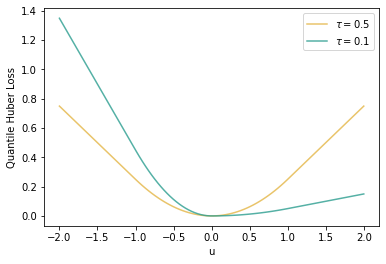

In [45]:
x_vals = np.linspace(-2,2,100)
y_vals = []
y_vals = [quantile(x,0.5) for x in x_vals]
plt.plot(x_vals,y_vals,label = r"$\tau = 0.5$",c=colors[3])
y_vals = []
y_vals = [quantile(x,0.1) for x in x_vals]
plt.plot(x_vals,y_vals,label = r"$\tau = 0.1$",c=colors[0])

plt.xlabel("u")
plt.ylabel("Quantile Huber Loss")
plt.legend()
plt.savefig("huber_loss.pdf")
plt.show()

## Chapter 3

0.0016942304054250318
0.996


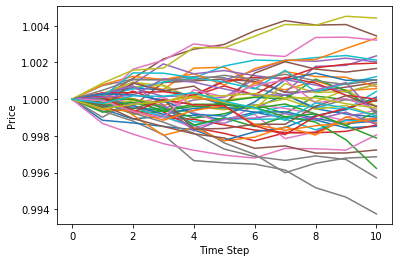

In [32]:
import library.market_modelsM
paper_vol = 8.3 * 10**(-3) / np.sqrt(24)
#paper_vol = 0.0008
print(paper_vol)
print(0.996)
n_steps = 10
bs_test = library.market_modelsM.bs_stock(1,0,vol=paper_vol,n_steps = n_steps)
from matplotlib import pyplot as plt
#bs_test = my_simulator.m.stock
for i in range(50):
    prices = [1]
    for t in range(n_steps):
        prices.append(bs_test.generate_price(1/n_steps))
    plt.plot(range(n_steps + 1),prices)
    bs_test.reset()

plt.xlabel("Time Step")
plt.ylabel("Price")
plt.savefig("presentation_fig3")

(array([1.06925198e-01, 0.00000000e+00, 5.34625988e-02, 5.34625988e-02,
        1.06925198e-01, 1.06925198e-01, 3.74238191e-01, 2.13850395e-01,
        2.13850395e-01, 5.88088586e-01, 7.48476383e-01, 1.17617717e+00,
        1.71080316e+00, 2.56620474e+00, 2.45927954e+00, 2.99390553e+00,
        4.49085830e+00, 5.77396067e+00, 8.01938981e+00, 9.40941738e+00,
        1.18686969e+01, 1.56110788e+01, 1.89257600e+01, 2.31493053e+01,
        2.94578919e+01, 3.50714648e+01, 4.28770042e+01, 5.13775574e+01,
        6.18027642e+01, 7.30299099e+01, 8.77855872e+01, 9.89592703e+01,
        1.12271457e+02, 1.33014946e+02, 1.52314944e+02, 1.69155662e+02,
        1.87386409e+02, 2.01500535e+02, 2.28071446e+02, 2.49403023e+02,
        2.66136817e+02, 2.83779474e+02, 3.10083073e+02, 3.20882518e+02,
        3.41786394e+02, 3.57557860e+02, 3.63759522e+02, 3.61407168e+02,
        3.68250380e+02, 3.73970878e+02, 3.77820185e+02, 3.82364506e+02,
        3.64026835e+02, 3.69480020e+02, 3.46277252e+02, 3.382578

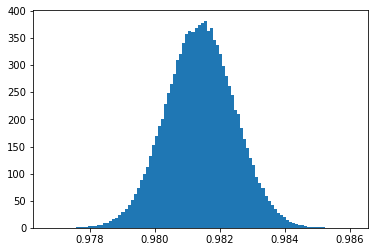

In [92]:
import library.market_modelsM
paper_vol = 8.3 * 10**(-3) / np.sqrt(24)
#paper_vol = 0.0008
print(paper_vol)
print(0.996)
n_steps = 10
bs_test = library.market_modelsM.bs_stock(1,0,vol=paper_vol,n_steps = n_steps)
from matplotlib import pyplot as plt
rets = []
for i in range(200000):
    ret = 0
    for t in range(n_steps):
        ret+=(bs_test.generate_price(1/n_steps))/n_steps
    rets.append(ret-0.0186)
    bs_test.reset()
plt.hist(rets,density=True,bins=100)